In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')


# Problem 1-Wholesale Customers Analysis 

In [4]:
## Data Ingestion:# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [5]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

# Summary Of Data Set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


# Inferences:
There are no null values and 440 rows of data with default index. There are 9 variables: 2 are object type 7 are integer type(int64)

In [7]:
df.sample(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
135,136,Hotel,Other,6300,1289,2591,1170,199,326
315,316,Retail,Oporto,1479,14982,11924,662,3891,3508
14,15,Retail,Other,24653,9465,12091,294,5058,2168
241,242,Hotel,Lisbon,24929,1801,2475,2216,412,1047
103,104,Hotel,Other,56082,3504,8906,18028,1480,2498
150,151,Hotel,Other,16225,1825,1765,853,170,1067
322,323,Hotel,Oporto,15881,713,3315,3703,1470,229
389,390,Hotel,Other,9385,1530,1422,3019,227,684
0,1,Retail,Other,12669,9656,7561,214,2674,1338
385,386,Hotel,Other,11635,922,1614,2583,192,1068


In [9]:
df.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [10]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


# Checking the Missing Value

# Dropping as no use column for our analysis( continuous types of feature Buyer/Spender)

In [11]:
wholesale_customer_drop_df = copy.deepcopy(df)
wholesale_customer_drop_df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [13]:
df_1=df.copy()

In [14]:
df_1["Total"]=df_1["Fresh"]+df_1["Milk"]+df_1["Grocery"]+df_1["Frozen"]+df_1["Detergents_Paper"]+df_1["Delicatessen"]
df_1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [15]:
df_2 = df_1.groupby(['Region','Channel']).sum().reset_index()
df_2

,Region,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,Hotel,14026,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon,Retail,4069,93600,194112,332495,46514,148055,33695,848471
2,Oporto,Hotel,8988,326215,64519,123074,160861,13516,30965,719150
3,Oporto,Retail,5911,138506,174625,310200,29271,159795,23541,835938
4,Other,Hotel,48020,2928269,735753,820101,771606,165990,320358,5742077
5,Other,Retail,16006,1032308,1153006,1675150,158886,724420,191752,4935522


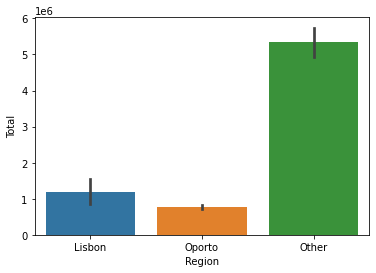

In [16]:
sns.barplot(x="Region",y="Total",data=df_2);

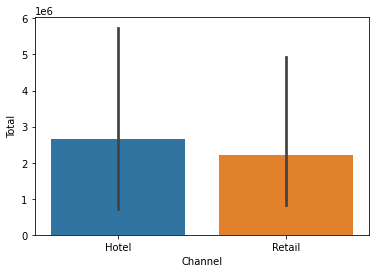

In [17]:
sns.barplot(x="Channel",y="Total",data=df_2);

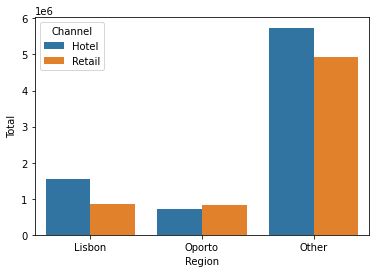

In [18]:
sns.barplot(x="Region",y="Total",data=df_2,hue="Channel");

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [19]:
df_3=df.select_dtypes(exclude=['object'])
df_3

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,4,13265,1196,4221,6404,507,1788
4,5,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,436,29703,12051,16027,13135,182,2204
436,437,39228,1431,764,4510,93,2346
437,438,14531,15488,30243,437,14841,1867
438,439,10290,1981,2232,1038,168,2125


In [20]:
df_4=df.select_dtypes(exclude=['int64'])
df_4

,Channel,Region
0,Retail,Other
1,Retail,Other
2,Retail,Other
3,Hotel,Other
4,Retail,Other
...,...,...
435,Hotel,Other
436,Hotel,Other
437,Retail,Other
438,Hotel,Other


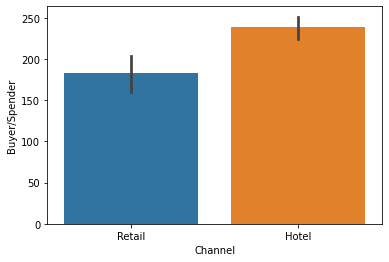

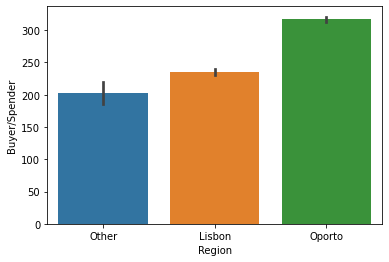

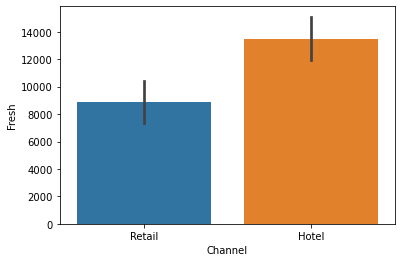

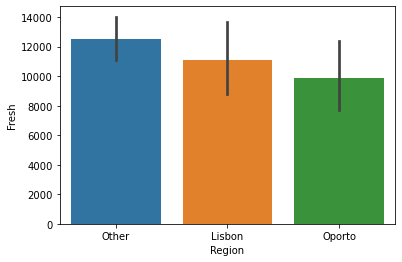

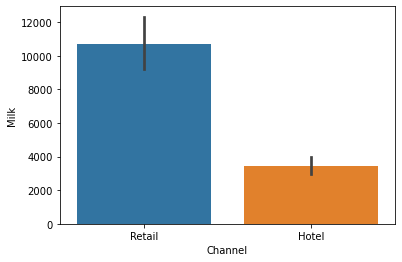

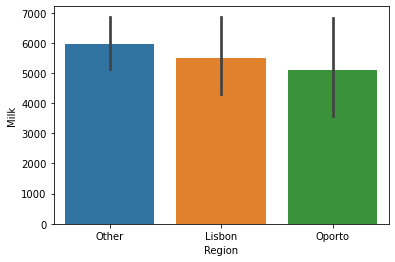

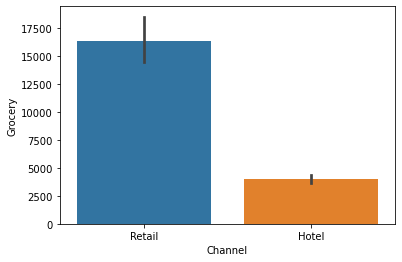

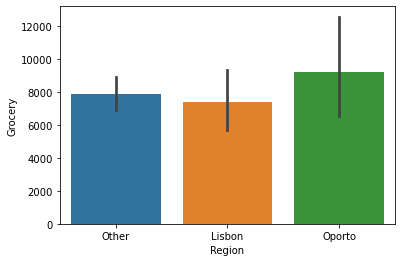

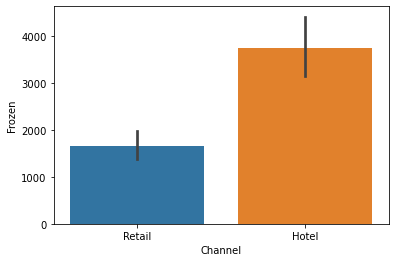

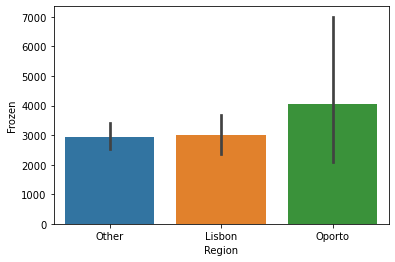

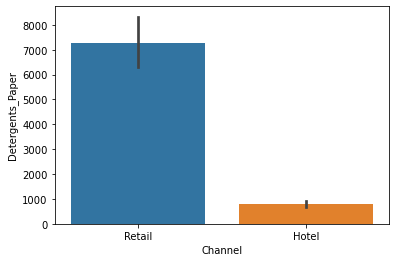

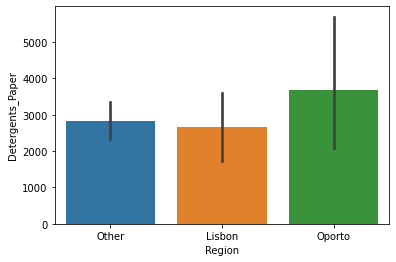

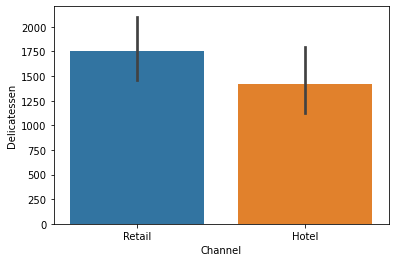

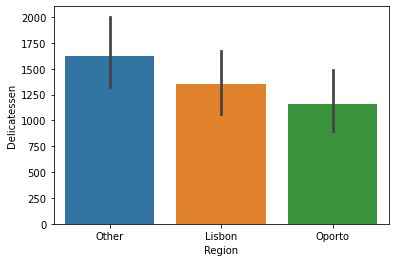

In [21]:
for i in df_3[1:]:
    for j in df_4[1:]:
        sns.barplot(y=df[i],x=df[j]);
        plt.show()

In [22]:
df_7 = df.drop(columns="Buyer/Spender",axis =1)
df_7

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [23]:
df_8= df_7.groupby('Region').sum()
df_8

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


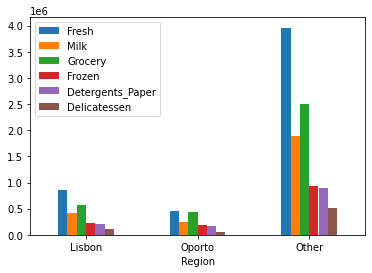

In [24]:
df_8.plot.bar(rot=0);

In [25]:
df_9= df_7.groupby('Channel').sum()
df_9

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


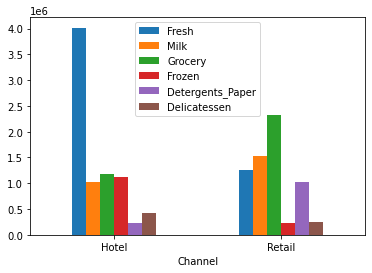

In [26]:
df_9.plot.bar(rot=0);

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [27]:
df_1.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total               26356.301730
dtype: float64

In [29]:
df_5=df_1.quantile(0.25)

In [28]:
df_6=df_1.quantile(0.75)

In [31]:
IQR =df_6-df_5
IQR

Buyer/Spender         219.50
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
Total               23858.75
dtype: float64

# Inferences:
Fresh item have highest Standard deviation So that is Inconsistent.¶ Delicatessen item have smallest Standard deviation, So that is consistent

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

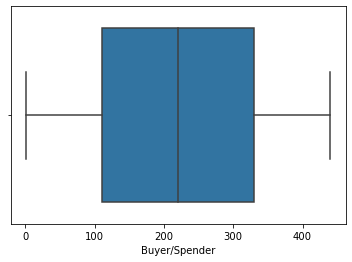

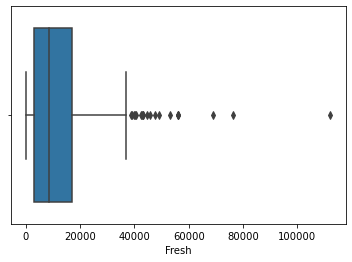

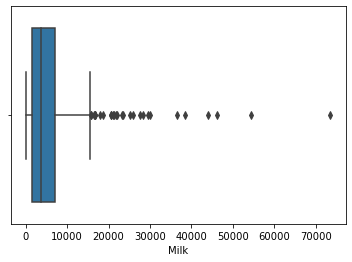

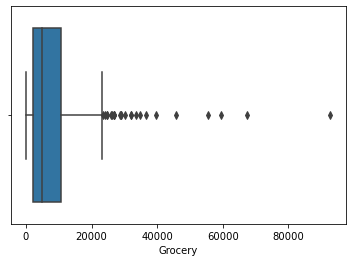

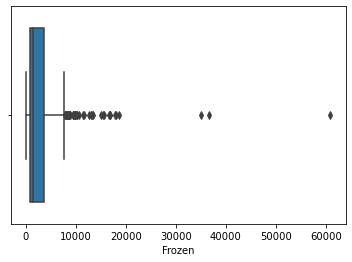

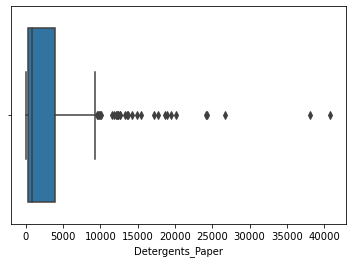

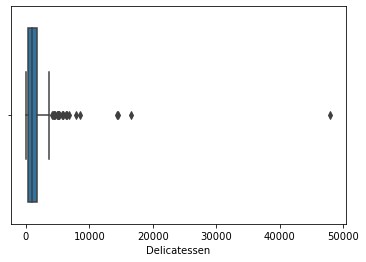

In [32]:
for i in df_3[1:]:
    sns.boxplot(x=df[i]);
    plt.show()

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

# As per the analysis, I find out that there are inconsistencies in spending of different items (by calculating
Coefficient of Variation), which should be minimized. The spending of Hotel and Retail channel are different which should be more or less equal. And also spent should equal for different regions. Need to focus on other items also than “Fresh” and “Grocery”

# Problem 2 - Clear Mountain State University (CMSU)

In [3]:
df=pd.read_csv("Survey-1.csv")

In [35]:
df.head(10)


,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [36]:
df["Computer"].unique()

array(['Laptop', 'Tablet', 'Desktop'], dtype=object)

In [37]:
df.dtypes

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

# 2.1.1. Gender and Major

In [20]:
pd.crosstab(df["Gender"],df["Major"],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


# 2.1.2. Gender and Grad Intention

In [21]:
pd.crosstab(df["Gender"],df["Grad Intention"],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


# 2.1.3. Gender and Employment

In [30]:
pd.crosstab(df["Gender"],df["Computer"],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.1.4. Gender and Computer

In [41]:
pd.crosstab(df["Gender"],df["Computer"],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [43]:
total_no_student = 62
total_no_male_student = 29
p_male=total_no_male_student/total_no_student
print(f"the probability of selection of male candidate is : {p_male*100}")

the probability of selection of male candidate is : 46.774193548387096


# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [44]:
total_no_student = 62
total_no_female_student = 33
p_female=total_no_female_student/total_no_student
print(f"the probability of selection of female candidate is : {p_female*100}")

the probability of selection of female candidate is : 53.2258064516129


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU

In [45]:
pd.crosstab(df["Gender"],df["Major"],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


# From the contingency table between gender and major we will get the right information. As the total no. of male candidate are 29

The participation male candidate in accounting is 4. we will denote it by m_acc.

The participation male candidate in CIS is 1. we will denote it by m_cis.

The participation male candidate in Economics/Finance is 4. we will denote it by m_ef.

The participation male candidate in International Business is 2. we will denote it by m_ib.

The participation male candidate in Management is 6. we will denote it by m_mg.

The participation male candidate in Other is 4. we will denote it by m_ot.

The participation male candidate in Retailing/Marketing is 5. we will denote it by m_rm.

The participation male candidate in Undecided is 3. we will denote it by m_un

In [46]:
m_acc = 4
m_cis = 1
m_ef = 4
m_ib = 2
m_mg = 6
m_ot = 4
m_rm = 5
m_un = 3

p_acc=(m_acc/total_no_male_student)/p_male
p_cis=(m_cis/total_no_male_student)/p_male
p_ef=(m_ef/total_no_male_student)/p_male
p_ib=(m_ib/total_no_male_student)/p_male
p_mg=(m_mg/total_no_male_student)/p_male
p_ot=(m_ot/total_no_male_student)/p_male
p_rm=(m_rm/total_no_male_student)/p_male
p_un=(m_un/total_no_male_student)/p_male

In [47]:
print(f"The probability of selection accounting as a male is : {p_acc*100}")
print(f"The probability of selection CIS as a male is : {p_cis*100}")
print(f"The probability of selection Economics/Finance as a male is : {p_ef*100}")
print(f"The probability of selection International Business as a male is : {p_ib*100}")
print(f"The probability of selection Management as a male is : {p_mg*100}")
print(f"The probability of selection Other as a male is : {p_ot*100}")
print(f"The probability of selection Retailing/Marketing as a male is : {p_rm*100}")
print(f"The probability of selection undecided as a male is : {p_un*100}")

The probability of selection accounting as a male is : 29.488703923900122
The probability of selection CIS as a male is : 7.3721759809750305
The probability of selection Economics/Finance as a male is : 29.488703923900122
The probability of selection International Business as a male is : 14.744351961950061
The probability of selection Management as a male is : 44.23305588585018
The probability of selection Other as a male is : 29.488703923900122
The probability of selection Retailing/Marketing as a male is : 36.860879904875155
The probability of selection undecided as a male is : 22.11652794292509


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

# From the contingency table between gender and major we will get the right information. As the total no. of female candidate are 33

The participation female candidate in accounting is 4. we will denote it by f_acc.

The participation female candidate in CIS is 1. we will denote it by f_cis.

The participation female candidate in Economics/Finance is 4. we will denote it by f_ef.

The participation female candidate in International Business is 2. we will denote it by f_ib.

The participation female candidate in Management is 6. we will denote it by f_mg.

The participation female candidate in Other is 4. we will denote it by f_ot.

The participation female candidate in Retailing/Marketing is 5. we will denote it by f_rm.

In [49]:
pd.crosstab(df["Gender"],df["Major"],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [50]:
f_acc = 3
f_cis = 3
f_ef = 7
f_ib = 4
f_mg = 4
f_ot = 3
f_rm = 9

pf_acc=(f_acc/total_no_female_student)/p_female
pf_cis=(f_cis/total_no_female_student)/p_female
pf_ef=(f_ef/total_no_female_student)/p_female
pf_ib=(f_ib/total_no_female_student)/p_female
pf_mg=(f_mg/total_no_female_student)/p_female
pf_ot=(f_ot/total_no_female_student)/p_female
pf_rm=(f_rm/total_no_female_student)/p_female

In [51]:
(3/33)/(33/62)

0.17079889807162535

In [52]:
print(f"The probability of selection accounting as a female is : {pf_acc*100}")
print(f"The probability of selection CIS as a female is : {pf_cis*100}")
print(f"The probability of selection Economics/Finance as a female is : {pf_ef*100}")
print(f"The probability of selection International Business as a female is : {pf_ib*100}")
print(f"The probability of selection Management as a female is : {pf_mg*100}")
print(f"The probability of selection Other as a female is : {pf_ot*100}")
print(f"The probability of selection Retailing/Marketing as a female is : {pf_rm*100}")
print("As the undecided female are zero the probability will be zero")

The probability of selection accounting as a female is : 17.079889807162534
The probability of selection CIS as a female is : 17.079889807162534
The probability of selection Economics/Finance as a female is : 39.85307621671259
The probability of selection International Business as a female is : 22.773186409550046
The probability of selection Management as a female is : 22.773186409550046
The probability of selection Other as a female is : 17.079889807162534
The probability of selection Retailing/Marketing as a female is : 51.2396694214876
As the undecided female are zero the probability will be zero


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate

In [54]:
total_no_male_student = 29
total_no_student_male_intends_to_graduate = 17
pm_grad=total_no_student_male_intends_to_graduate/total_no_male_student
print(f"The probability of male student want to graduate is : {pm_grad*100}")

The probability of male student want to graduate is : 58.620689655172406


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [55]:
total_no_female_student = 33
total_no_student_female_intends_to_graduate = 11
pf_grad=total_no_student_female_intends_to_graduate/total_no_female_student
print(f"The probability of female student want to graduate is : {pf_grad*100}")

The probability of female student want to graduate is : 33.33333333333333


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question

In [57]:
pd.crosstab(df["Gender"],df["Employment"],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [58]:
total_no_male_student = 29
total_no_ft_emp = 10
male_no_ft_emp = 7
total_ss = 62
pm_select =(total_no_male_student/total_ss)+(total_no_ft_emp/total_ss)-(male_no_ft_emp/total_ss)
print(f"Hence the probability that a randomly chosen student is a male or has full-time employment : {pm_select*100}")

Hence the probability that a randomly chosen student is a male or has full-time employment : 51.61290322580645


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management

In [59]:
pd.crosstab(df["Gender"],df["Major"],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [67]:
total_no_female_student = 33
f_ib = 4
pib_select = (f_ib/total_no_female_student)/p_female
print(f"Hence the conditional probability that given a female student is randomly chosen, she is majoring in international business or management : {pib_select*100}")

Hence the conditional probability that given a female student is randomly chosen, she is majoring in international business or management : 22.773186409550046


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [68]:
df_1 = pd.crosstab(df["Gender"],df["Grad Intention"],margins=True)
df_1

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [69]:
df_2= df_1.drop(columns="Undecided",axis=1)
df_2

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,33
Male,3,17,29
All,12,28,62


In [70]:
the_no_student_want_to_graduate = 28
the_no_female_want_to_graduate = 11
total_ss = 62
prob_stu_gradute=the_no_student_want_to_graduate/total_ss 
print(f"Probability of student graduate : {prob_stu_gradute*100}")
prob_fe_stu_gradute=the_no_female_want_to_graduate/total_ss 
print(f"Probability of female student graduate : {prob_fe_stu_gradute*100}")

Probability of student graduate : 45.16129032258064
Probability of female student graduate : 17.741935483870968


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages

# Answer the following questions based on the data

# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3

In [72]:
df_3 = df[df["GPA"]<3]["GPA"].agg("count")
df_3

17

In [73]:
prob_gpa_less3 = df_3/total_ss
print(f"the probability that his/her GPA is less than 3 : {prob_gpa_less3*100}")

the probability that his/her GPA is less than 3 : 27.419354838709676


# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [74]:
df_4=df[df["Salary"]>=50]
df_4.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200


In [75]:
pd.crosstab(df_4["Gender"],df_4["Salary"],margins=True)

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,
Female,5,0,0,5,5,0,1,1,1,18
Male,4,1,1,3,3,1,0,0,1,14
All,9,1,1,8,8,1,1,1,2,32


In [76]:
total_male_50 = 14
total_female_50 = 18
prob_male_50=(total_male_50/total_ss)/p_male
prob_female_50=(total_female_50/total_ss)/p_female
print(f"the conditional probability that a randomly selected male earns 50 or more : {prob_male_50*100}")
print(f"the conditional probability that a randomly selected female earns 50 or more : {prob_female_50*100}")

the conditional probability that a randomly selected male earns 50 or more : 48.275862068965516
the conditional probability that a randomly selected female earns 50 or more : 54.545454545454554


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions

The skewness of GPA is :-0.3146000894506981


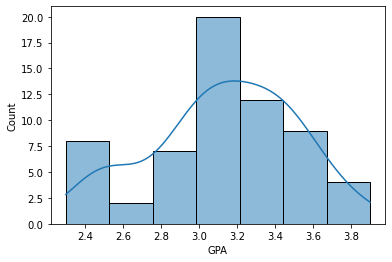

In [77]:
sns.histplot(df["GPA"],kde=True);
sk_gpa = df.GPA.skew()
print(f"The skewness of GPA is :{sk_gpa}")

The skewness of Salary is :0.5347008436225946


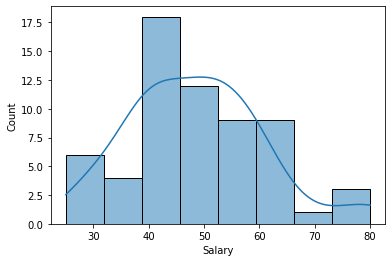

In [78]:
sns.histplot(df["Salary"],kde=True);
sk_salary = df.Salary.skew()
print(f"The skewness of Salary is :{sk_salary}")

The skewness of Spending is :1.5859147414045331


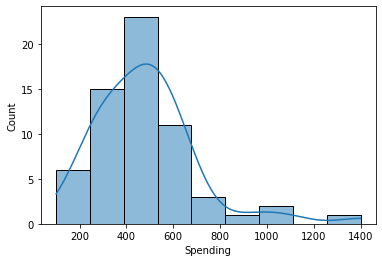

In [79]:
sns.histplot(df["Spending"],kde=True);
sk_spending = df.Spending.skew()
print(f"The skewness of Spending is :{sk_spending}")

The skewness of Text Messages is :1.2958079731054333


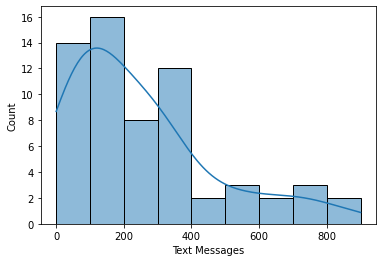

In [80]:
sns.histplot(df["Text Messages"],kde=True);
sk_text = df["Text Messages"].skew()
print(f"The skewness of Text Messages is :{sk_text}")

# Problem 3-A & B  Shingles

In [33]:
df = pd.read_csv('A+&+B+shingles.csv') 

In [34]:
df.head(35)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [36]:
df.isnull().sum()

A    0
B    5
dtype: int64

In [37]:
df.dropna(inplace=True)
df.shape                  # Additional Validation

(31, 2)

In [38]:
df.describe() ## Performed to understand if 5 point summary of the data.

,A,B
count,31.000000,31.000000
mean,0.308710,0.273548
std,0.143637,0.137296
min,0.130000,0.100000
25%,0.200000,0.160000
50%,0.270000,0.230000
75%,0.390000,0.400000
max,0.720000,0.580000


# 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps

In [39]:
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import variation
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chi2_contingency;


In [40]:
tA,pA=stats.ttest_1samp(df.A,0.35)
print(tA)
print(pA/2)

-1.6005252585398313
0.05998085400516971


# Since pvalue > 0.05, do not reject H0 . There is not enough evidence to conclude that the mean moisturecontent for Sample A shingles is less than 0.35 pounds per 100 square feet. p-value = 0.0748. If the populationmean moisture content is in fact no less than 0.35 pounds per 100 square feet, the probability of observing asample of 36 shingles that will result in a sample mean moisture content of 0.3167 pounds per 100 square feet or less is .0748.

In [41]:
TB,PB=stats.ttest_1samp(df.B,0.35,nan_policy='omit')
print(TB)
print(PB/2)

-3.1003313069986995
0.0020904774003191813


# Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. p-value = 0.0021. If the population mean moisture content is in fact no less than 0.35pounds per 100 square feet, the probability of observing a sample of 31 shingles that will result in a sample mean moisture content of 0.2735 pounds per 100 square feet or less is 0.0021¶

# 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [42]:
print('The Variance of shingles A is', df.A.var())
print('The Variance of shingles B is',df.B.var())

The Variance of shingles A is 0.020631612903225804
The Variance of shingles B is 0.018850322580645163


In [43]:
# H0:Mean of moisture content in Sample A is equal to Mean of moisture in Sample B 
# H1:Mean of moisture content in Sample A is not equal to Mean of moisture in Sample B
sh_tB,sh_pB=stats.ttest_ind(df.A,df.B,nan_policy='omit')
print(sh_tB)
print(sh_pB)

0.985249977839441
0.3284577916404776


# As the pvalue > α , do not reject H0; and we can say that population mean for shingles A and B are equal Test Assumptions When running a two-sample t-test, the basic assumptions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same. If those assumptions are not likely to be met, another testing procedure could be use.¶

# THE END